In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [130]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2:].values

In [131]:
df.shape

(400, 3)

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [133]:
X_train.shape

(320, 2)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
cls = DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=5,min_samples_split=2)

In [137]:
cls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [138]:
y_pred = cls.predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[56  2]
 [ 3 19]]


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        58
           1       0.90      0.86      0.88        22

    accuracy                           0.94        80
   macro avg       0.93      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



[Text(0.40086206896551724, 0.9166666666666666, 'X[0] <= 44.5\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.15517241379310345, 0.75, 'X[1] <= 90500.0\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.06896551724137931, 0.5833333333333334, 'X[0] <= 36.5\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.034482758620689655, 0.4166666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.10344827586206896, 0.4166666666666667, 'X[1] <= 83500.0\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.06896551724137931, 0.25, 'X[1] <= 67500.0\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.034482758620689655, 0.08333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.10344827586206896, 0.08333333333333333, 'gini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.13793103448275862, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2413793103448276, 0.5833333333333334, 'X[0] <= 26.5\ngini = 0.245\nsamples = 42\nvalue = [6, 36

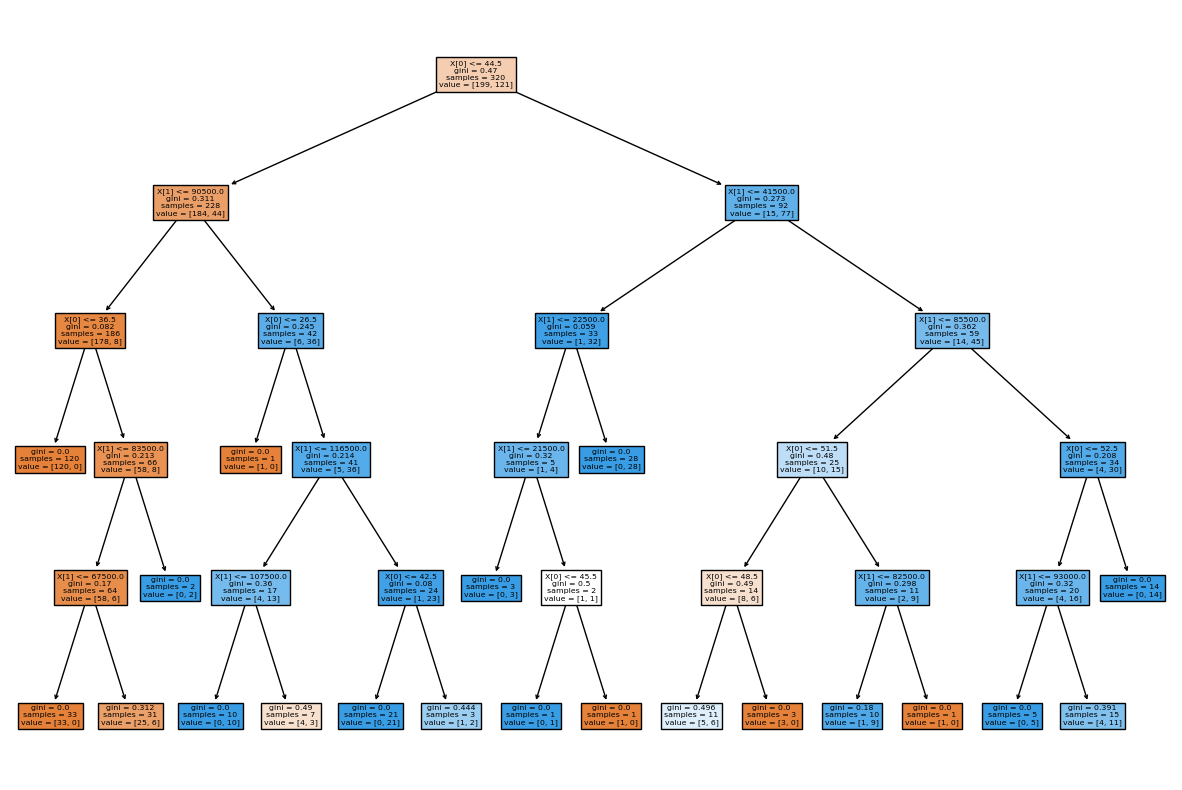

In [141]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(cls,filled=True)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9375